# Exploring dataset E

As we have seen in the previuos notebook, there are some additional information in the label file of dataset **E**. We are going to explore that in this notebook.
<br>
<br>
The digits from dataset **E** are extracted from the `BanglaLekha-Isolated` dataset which contains Bangla handwritten numerals, basic characters and compound characters. 
<br>
The `BanglaLekha-Isolated` dataset was collected from Dhaka and Comilla. The age group of the subjects ranged from 6 years to 28 years with a high density between the ages of 16–20. Among the subjects, 59.4% were males while the remaining 40.6% were females.
More details can be found in the dataset description [here.](https://www.sciencedirect.com/science/article/pii/S2352340917301117)

In [2]:
# Importing necessary libraries
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Declare fontsize variables which will be used while plotting the data
FS_AXIS_LABEL=14
FS_TITLE=17
FS_TICKS=12
FIG_WIDTH=16

In [50]:
# Setup paths
project_dir='..'
path_label_train_e=os.path.join(project_dir,'Final_DB','training-e.csv')
path_label_test_e=os.path.join(project_dir,'Final_DB','testing-e.csv')

In [57]:
# Let's get the label files in a dataframe 
df_train_e=pd.read_csv(path_label_train_e)
df_test_e=pd.read_csv(path_label_test_e)
df_train_e.head()

,original filename,districtid,institutionid,gender,age,datestamp,scanid,digit,database name original,database name,filename
0,01_0001_0_17_0916_0193_55.png,1,1,0,17,916,193,4,BanglaLekha-Isolated,training-e,e00000.png
1,02_0002_0_23_1016_0858_57.png,2,2,0,23,1016,858,6,BanglaLekha-Isolated,training-e,e00001.png
2,02_0002_0_14_1016_1673_51.png,2,2,0,14,1016,1673,0,BanglaLekha-Isolated,training-e,e00002.png
3,02_0002_0_26_1016_1828_56.png,2,2,0,26,1016,1828,5,BanglaLekha-Isolated,training-e,e00003.png
4,02_0002_1_19_1016_1336_59.png,2,2,1,19,1016,1336,8,BanglaLekha-Isolated,training-e,e00004.png


The information in the districtid and institutionid column is similar. Here, `1` stands for `Dhaka` and `2` stands for `Comilla`. For the `gender` column `0` denotes `Male` and `1` denotes `Female`.

### Distribution of digits by age

The `age` columns contains the age information of the participants. We are going to use the `.value_counts()` method to get the number of occurrence of each age. The `.sort_index()` method sorts the index (age) of the resulting Series so that we can plot the age values in ascending order. This will give us a better understanding of the distribution of the participant's ages.

In [64]:
train_age_vc=df_train_e['age'].value_counts().sort_index()

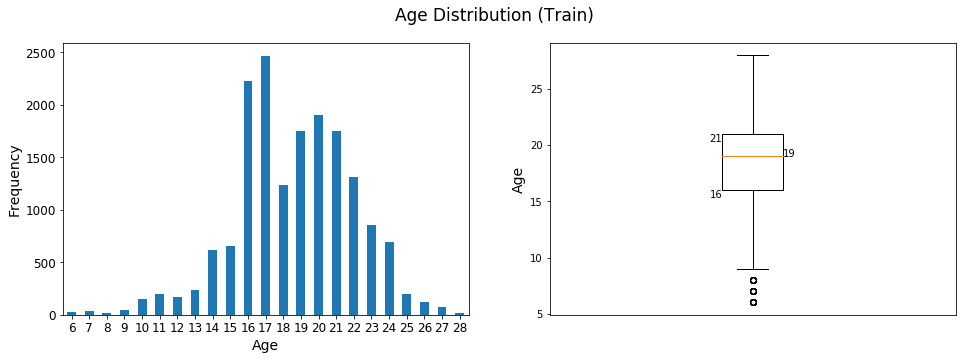

In [173]:
#barplot
plt.figure(figsize=(FIG_WIDTH,5))
plt.suptitle('Age Distribution (Train)',fontsize=FS_TITLE)
plt.subplot(1,2,1)
train_age_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Age', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
#boxplot
plt.subplot(1,2,2)
bp_dict=plt.boxplot(df_train_e['age'])
plt.xticks([0],[''],fontsize=FS_TICKS)
plt.ylabel('Age', fontsize=FS_AXIS_LABEL)
for line in bp_dict['medians']:
    # get position data for median line (2nd quartile line)
    x, y = line.get_xydata()[1] # terminal point of median line
    plt.text(x, y, '{:.0f}'.format(y), horizontalalignment='left') 

for line in bp_dict['boxes']:
    # get position data for 1st quartile line
    x, y = line.get_xydata()[0] 
    plt.text(x,y, '{:.0f}'.format(y), horizontalalignment='right', verticalalignment='top')     
    # get position data for 3rd quartile line
    x, y = line.get_xydata()[3] 
    plt.text(x,y, '{:.0f}'.format(y), horizontalalignment='right', verticalalignment='top')
plt.show()

In [66]:
test_age_vc=df_test_e['age'].value_counts().sort_index()

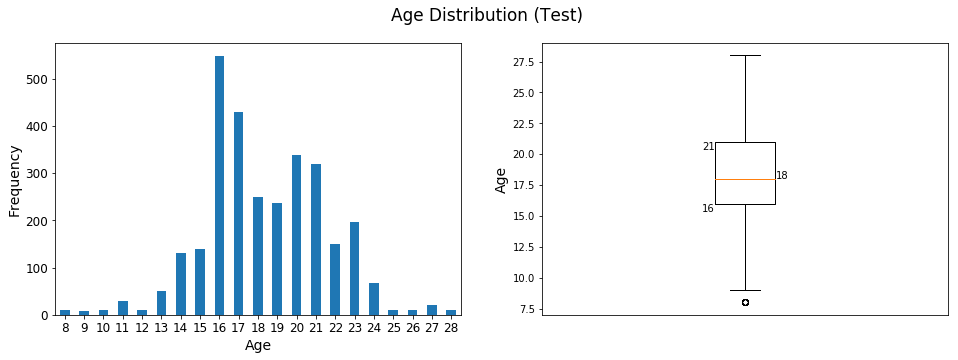

In [174]:
#barplot
plt.figure(figsize=(FIG_WIDTH,5))
plt.suptitle('Age Distribution (Test)',fontsize=FS_TITLE)
plt.subplot(1,2,1)
test_age_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Age', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
#boxplot
plt.subplot(1,2,2)
bp_dict=plt.boxplot(df_test_e['age'])
plt.xticks([0],[''],fontsize=FS_TICKS)
plt.ylabel('Age', fontsize=FS_AXIS_LABEL)
for line in bp_dict['medians']:
    # get position data for median line (2nd quartile line)
    x, y = line.get_xydata()[1] # terminal point of median line
    plt.text(x, y, '{:.0f}'.format(y), horizontalalignment='left') 

for line in bp_dict['boxes']:
    # get position data for 1st quartile line
    x, y = line.get_xydata()[0] 
    plt.text(x,y, '{:.0f}'.format(y), horizontalalignment='right', verticalalignment='top')     
    # get position data for 3rd quartile line
    x, y = line.get_xydata()[3] 
    plt.text(x,y, '{:.0f}'.format(y), horizontalalignment='right', verticalalignment='top')
plt.show()

There are some differences between the distribution in the test and train set (e.g., 17, 19, 22 year old participants). The interquartile range (the range within which the innermost 50% of the data resides) for both train and test set is between 16 to 21 years. 

### Distribution of digits by district

In [111]:
train_district_vc=df_train_e['districtid'].value_counts()

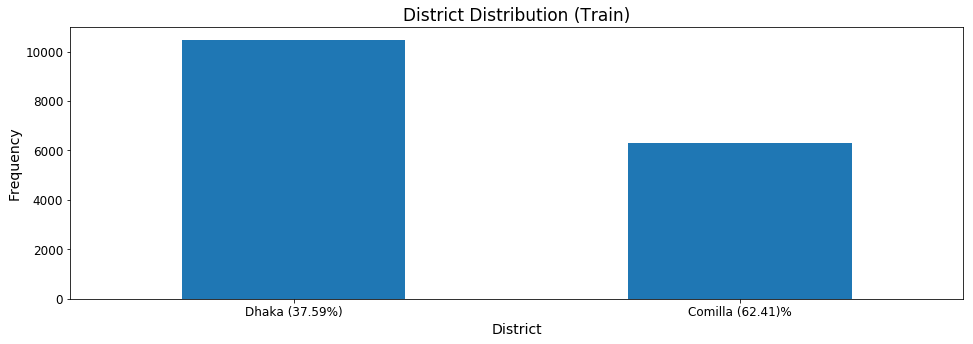

In [112]:
plt.figure(figsize=(FIG_WIDTH,5))
train_district_vc.plot(kind='bar')
plt.yticks(fontsize=FS_TICKS)
xlabels=['Dhaka ({:.2f}%)'.format(train_district_vc.loc[1]/train_district_vc.sum()*100),
        'Comilla ({:.2f})%'.format(train_district_vc.loc[2]/train_district_vc.sum()*100)]
plt.xticks([0,1],xlabels,rotation='horizontal',fontsize=FS_TICKS)
plt.xlabel('District', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('District Distribution (Train)',fontsize=FS_TITLE)
plt.show()

In [113]:
test_district_vc=df_test_e['districtid'].value_counts()

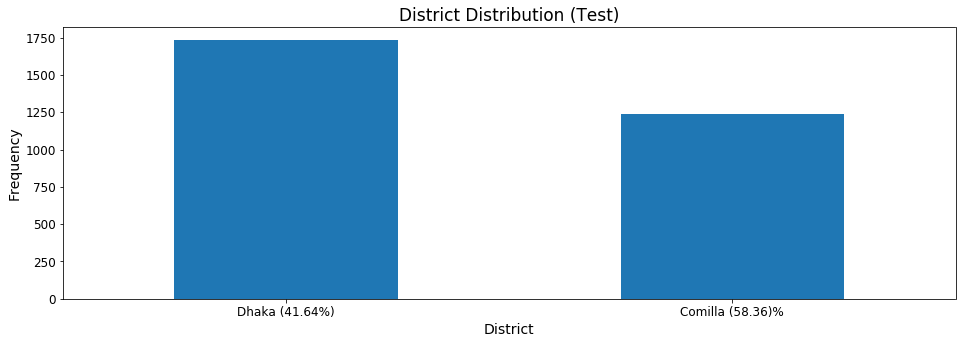

In [114]:
plt.figure(figsize=(FIG_WIDTH,5))
test_district_vc.plot(kind='bar')
plt.yticks(fontsize=FS_TICKS)
xlabels=['Dhaka ({:.2f}%)'.format(test_district_vc.loc[1]/test_district_vc.sum()*100),
        'Comilla ({:.2f})%'.format(test_district_vc.loc[2]/test_district_vc.sum()*100)]
plt.xticks([0,1],xlabels,rotation='horizontal',fontsize=FS_TICKS)
plt.xlabel('District', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('District Distribution (Test)',fontsize=FS_TITLE)
plt.show()

There are less digits from Dhaka than Comilla. The ratio is slightly higher in the test dataset.  

### Distribution of images by gender

In [97]:
train_gender_vc=df_train_e['gender'].value_counts()

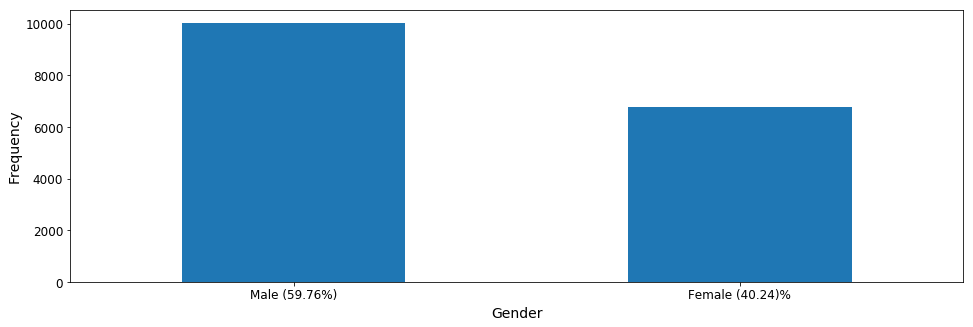

In [39]:
plt.figure(figsize=(FIG_WIDTH,5))
train_gender_vc.plot(kind='bar')
plt.yticks(fontsize=FS_TICKS)
xlabels=['Male ({:.2f}%)'.format(train_gender_vc.loc[0]/train_gender_vc.sum()*100),
        'Female ({:.2f})%'.format(train_gender_vc.loc[1]/train_gender_vc.sum()*100)]
plt.xticks([0,1],xlabels,rotation='horizontal',fontsize=FS_TICKS)
plt.xlabel('Gender', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Gender Distribution (Train)',fontsize=FS_TITLE)
plt.show()

In [106]:
test_gender_vc=df_test_e['gender'].value_counts()

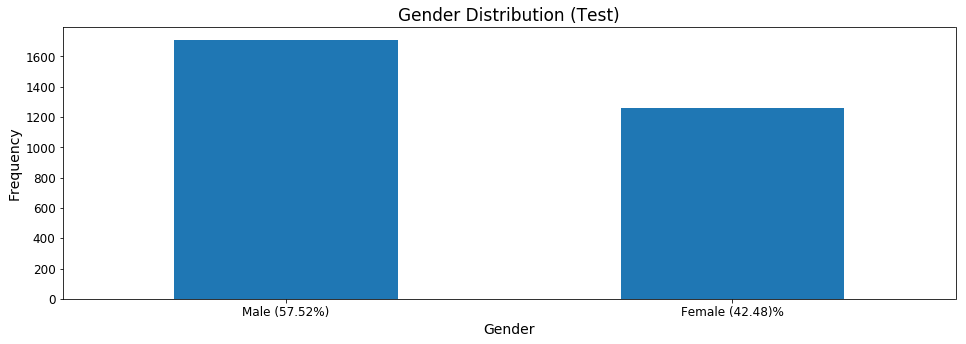

In [107]:
plt.figure(figsize=(FIG_WIDTH,5))
test_gender_vc.plot(kind='bar')
plt.yticks(fontsize=FS_TICKS)
xlabels=['Male ({:.2f}%)'.format(test_gender_vc.loc[0]/test_gender_vc.sum()*100),
        'Female ({:.2f})%'.format(test_gender_vc.loc[1]/test_gender_vc.sum()*100)]
plt.xticks([0,1],xlabels,rotation='horizontal',fontsize=FS_TICKS)
plt.xlabel('Gender', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Gender Distribution (Test)',fontsize=FS_TITLE)
plt.show()

There are more digits from male participants. The male to female ratio is similar in both test and train set.

Since we have age, district and gender information of the participants, the digits could be differenciated based on them. We have to bear in mind that the dataset is imbalanced (with respect to age/distric/gender) which would have significant effect on the classifier model.